# 🧬 Sequence Alignment Map (SAM) Format Introduction

## 📚 Introduction to the SAM Format

The **SAM format** (Sequence Alignment/Map) is a widely used **text-based format** for storing biological sequence alignment data, especially from **next-generation sequencing (NGS)** experiments.  
It was developed as part of the **SAMtools** project to efficiently handle **large volumes of sequence reads aligned** to a reference genome.

---

## 📂 Structure of a SAM File

Each line in a SAM file represents one read and its alignment information.  
A SAM file consists of two parts:

- **Header Section (optional)**:  
  Lines beginning with `@` that describe metadata like reference sequences (`@SQ`) and program versions (`@PG`).
  
- **Alignment Section**:  
  A table where each row describes one read, with fields separated by **tabs**.

---

## 🔑 Main Fields in a SAM Alignment Entry

The **11 mandatory fields** are:

| Field | Description |
|:-----|:------------|
| QNAME | Query (read) name |
| FLAG | Bitwise flag describing the read status (e.g., paired, mapped, reversed) |
| RNAME | Reference sequence name (e.g., chromosome) |
| POS | 1-based leftmost position of clipped alignment |
| MAPQ | Mapping quality score |
| CIGAR | Compact representation of alignment (matches, insertions, deletions) |
| RNEXT | Reference name of the mate/next read |
| PNEXT | Position of the mate/next read |
| TLEN | Observed Template Length |
| SEQ | Sequence of the read |
| QUAL | Base quality scores |

---

### 🧙‍♀️ Example SAM Line

In [ ]:
#read123	0	chr1	100	255	4M	*	0	0	ACTG	IIII

---

## 📦 SAM vs BAM

- **SAM**: Text-based, human-readable.
- **BAM**: Binary version of SAM. Compressed for efficient storage and fast access.

# 🧵 The CIGAR String

The **CIGAR** string describes how the read aligns with the reference genome:

- Events are **length + type**.
- Common event types:
  - `M`: Match (can be sequence match or mismatch)
  - `I`: Insertion to the reference
  - `D`: Deletion from the reference
  - `S`: Soft clipping (clipped sequences present in SEQ)
  - `H`: Hard clipping (clipped sequences NOT present in SEQ)

---

### ✏️ Example: CIGAR String Explained

In [ ]:
# CIGAR: 10M1I5M5D10M

# 10 matches
# 1 inserted base (in read, not in reference)
# 5 matches
# 5 deleted bases (present in reference, not read)
# 10 matches

> ⚡ Note: **Deletions** cannot be directly shown in the SEQ field — they are indicated separately, e.g., using **MD tags**. The MD tag is not a default tag and must be actively integrated. It is especially useful when the reference should be reconstructed using only the SAM file.

# 🧬 Nucleotide Modification Tags (MM/ML)

In **Oxford Nanopore Technologies (ONT)** data, SAM/BAM formats are enhanced to store additional biological information like **base modifications**.

**Base modifications** are stored using two special tags:

- **MM (Modified Bases)**: Lists which bases are modified and where.
- **ML (Modification Likelihoods)**: Lists probabilities of modifications.

---

### 🔎 Example with MM and ML Tags

In [ ]:
#read123	0	chr1	100	255	4M	*	0	0	ACTG	IIII	MM:Z:C+m,5,2,1; ML:B:C,200,180,150

**MM Tag**:  
- `MM:Z:C+m,5,2,1;`
- Meaning:
  - Modified base: Cytosine (`C`)
  - Modification type: `+m` (e.g., methylation)
  - Modified positions:
    - 6th `C`
    - After 2 more `C`s
    - After 1 more `C`

**ML Tag**:  
- `ML:B:C,200,180,150`
- Meaning:
  - Probabilities:
    - 200/255 ≈ 78%
    - 180/255 ≈ 70%
    - 150/255 ≈ 59%

> ⚡ Tip: Probabilities are stored as 8-bit integers (0–255).

# 🛠️ Tools for Handling SAM/BAM Files

| Tool | Description |
|:----|:------------|
| **samtools** | Command-line tool for general operations: sort, index, filter, summarize |
| **pysam** | Python package for fine-grained read manipulation (e.g., analyzing base modifications) |
| **Modkit** | Oxford Nanopore Technologies' command line tool for modification detection and analysis |
| **IGV (Integrative Genomics Viewer)** | GUI to visualize alignments, detect systematic errors like indels, coverage issues, or structural variants |

---

# 📖 Further Documentation

- **SAM Format Specification**:  
  👉 [https://samtools.github.io/hts-specs/SAMv1.pdf](https://samtools.github.io/hts-specs/SAMv1.pdf)

- **Tags like MM and ML (Extended SAM Tags)**:  
  👉 [https://samtools.github.io/hts-specs/SAMtags.pdf](https://samtools.github.io/hts-specs/SAMtags.pdf)
  
- **Samtools**:  
  👉 [https://www.htslib.org/doc/samtools.html](https://www.htslib.org/doc/samtools.html)

- **Pysam**:  
  👉 [https://pysam.readthedocs.io/en/latest/api.html](https://pysam.readthedocs.io/en/latest/api.html)

- **Modkit**:  
  👉 [https://nanoporetech.github.io/modkit/](https://nanoporetech.github.io/modkit/)

- **IGV**:  
  👉 [https://igv.org/doc/desktop/](https://igv.org/doc/desktop/)

--- 

# Cheat sheet samtools functionalities

Samtools is a command line based tool to visaulize summarize and manipulate SAM and BAM files.

- **View SAM/BAM bamfile**:
    - 👉 samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...] > [out.bam]
    - 👉 samtools view --help (Open Manual)
    - 👉 Check the manual for possible filter methods. Especially the flags -F and -f can be very helpful, to filter SAM/BAM files for reads with specific properties. 
    - 👉 Ensure to set the falgs -h and -b to include headers and produce a binary data output
    - 👉 Check [https://broadinstitute.github.io/picard/explain-flags.html](https://broadinstitute.github.io/picard/explain-flags.html) to play with possible filter options. 
    
- **Sort SAM/BAMbamfile**:
    - 👉 samtools sort [options...] [in.bam] > [out.bam]
    - 👉 samtools sort --help (To open Manual)
    - 👉 Many downstream analysis tools require sorted SAM/BAM files. The default sorts read by read length in a descending manner. 

- **Index SAM/BAM file**:
    - 👉 samtools index [in.bam]
    - 👉 samtools index --help
    - 👉 Indexing the SAM/BAM file is necessary to visualize the alignment with a genome viewer like IGV.

- **Summarize the alignment file**:
    - 👉 samtools stats [OPTIONS] file.bam
    - 👉 samtools stats --help
    - 👉 Summarizes how many reads align on different chromosomes of the reference.

- **Index fasta files**:
    - 👉 samtools faidx [in.bam]
    - 👉 samtools faidx --help
    - 👉 IGV additionally needs indexed reference files in fasta format for visualization. 
    


---
# Cheat sheet pysam
In contrast to samtools pysam is a python libraries to operate on SAM/BAM file format. It allows to operate on reads in a single nucleotide resolution manner. 
In pysam reads are accessed with a for loop. A BAM file must be indexed before it can be manipulated with pysam. 

In [1]:

import pysam
from pathlib import Path

#Define a path
bamfile_path = Path("./test_data/test.bam")

#Initialize the bamfile 
bamfile = pysam.AlignmentFile(bamfile_path, mode="rb")

#Initialize a second BAM/SAM file if you want to write on it


#Run the for loop 
for read in bamfile.fetch(until_eof=True):
    
    #Print the read id 
    print("###Read id###")
    print(read.query_name)
    print("\n")
    
    #Access the query sequence of the read
    print("###Sequence###")
    print(read.query_sequence[0:100]) #First 100 nucleotides only
    print("\n")
    
    #Access Cigartstring or a tuple version of the CIGAR string
    print("###Cigatsring###")
    print(read.cigarstring[0:100]) #First 100 operations only
    print("\n")
    
    print("###Cigartuple###")
    print(read.cigartuples[0:100]) #First 100 operations only
    print("\n")
    
    #Access alignment pairs between query sequence and 
    print("###Aligment pairs between query and reference###")
    print(read.get_aligned_pairs()[0:100]) #First 100 operations only
    print("\n")
    
    #Access read length
    print("###Query Length###")
    print(read.query_length)
    print("\n")
    
    #Access available modification information
    print("###Modified bases###")
    print(read.modified_bases)
    print("\n")
    #The output of moddified bases is a dictionary, which carries a key being composed of three parts ('Modified Nucleotide',0,'Modification identifier')
    #The value of the values in the dictionary is a list which stores the following information in tuples: (position_on_query, modification_probability)
    #The modification probability is stored as a number between 0-256 (8-bit integer), which corresponds to a probability between 0-100%
    #To align all modifications to the reference, one needs to transfer the position on the query to th position on the reference.
    #The latter can be achieved by using the get_aligned_pairs function in combination with the modified_bases variable as shown below. 
    aligned_pairs = read.get_aligned_pairs(with_seq=True)
    alignment_dict = {}
    for pair_element in aligned_pairs:
        if None not in pair_element:
            alignment_dict[pair_element[0]] = {"index_query":pair_element[0],"index_reference":pair_element[1]}
    #The transfer of the position on the reference can then be executed
    modification_object = read.modified_bases
    if modification_object != None:
        m6a_modifications_on_read = list(modification_object[('A', 0, 'a')])
        for m6a_modification in m6a_modifications_on_read: #m6a modification is the tuple element (position_on_query, modification_probability) 
            try:
                index_on_reference = alignment_dict[m6a_modification[0]]["index_reference"]
                probability_of_modification = m6a_modification[1] / 256
                print("Reference index:\n",index_on_reference,"\n", "Probability of modification:\n",probability_of_modification)
                #We will print only one base on this read for didactic reasons
                break
            except KeyError:
                continue
    #Explore the pysam documentation for more functions
    break
bamfile.close()

###Read id###
3b24d9c7-d599-48eb-a730-377a79796d50


###Sequence###
GCGGAGCGAGCCGCCGGGAGGATGTGCGCCGAGCGCCCCGAGCCCCGCGCCGCCGCGCTTTGAGGGCCGCGGGCGAGAGGCACCTCCGCCGCCCCGGAAG


###Cigatsring###
1S46M3D168M2I45M1I3M1D23M1D59M1D54M1D130M1I17M3I944M3D195M73242N126M181N116M439N104M1D113M2D37M1D11M


###Cigartuple###
[(4, 1), (0, 46), (2, 3), (0, 168), (1, 2), (0, 45), (1, 1), (0, 3), (2, 1), (0, 23), (2, 1), (0, 59), (2, 1), (0, 54), (2, 1), (0, 130), (1, 1), (0, 17), (1, 3), (0, 944), (2, 3), (0, 195), (3, 73242), (0, 126), (3, 181), (0, 116), (3, 439), (0, 104), (2, 1), (0, 113), (2, 2), (0, 37), (2, 1), (0, 11), (3, 184), (0, 20), (2, 2), (0, 55), (2, 2), (0, 214), (3, 1434), (0, 231), (3, 326), (0, 395), (2, 1), (0, 173), (1, 2), (0, 92), (1, 3), (0, 9), (1, 1), (0, 350), (1, 1), (0, 100), (2, 1), (0, 67), (2, 2), (0, 301), (2, 6), (0, 123), (2, 1), (0, 25), (1, 1), (0, 3), (2, 1), (0, 57), (1, 2), (0, 66), (2, 3), (0, 25), (2, 1), (0, 78), (2, 1), (0, 16), (2, 1), (0, 147), (2, 3), (0, 561)

---
# Cheat sheet modkit
Fortunately there are tools like Oxford Nanopore Technologies' modkit, which already automatize such an extraction. The tool uses a rust library called htslib, which has similar functionalities to pysam, but even a bit faster.
With Modkit the extraction about modification information is automatized and wrapped into a handy command line tool. 

## Modkit pileup



In [4]:
import os
#Modkit pileup creates a bed file with modification information
bashCommand = "modkit pileup --filter-threshold 0.95 ./test_data/test.bam ./test_data/test_pileup.bed --log-filepath test_data/test.log"
os.system(bashCommand)
#The bed file can be read with pandas
import pandas as pd
bed_df = pd.read_csv("test_data/test_pileup.bed", sep="\t", header=None)
bed_df.columns = ["chromosome",
                  "start_position",
                  "end_position",
                  "modified_base_code_and_motif",
                  "score",
                  "strand",
                  "start_position_again",
                  "end_position_again",
                  "color", 
                  "Nvalid_cov", 
                  "percent_modified",
                  "Nmod",
                  "Ncanonical",
                  "Nother_mod",
                  "Ndelete",
                  "Nfail",
                  "Ndiff",
                  "Nnocall"]
#Print the first 5 lines of the bed file
print(bed_df.head())

#Please check all the options modkit pileup offers. 
#You can use different filter settings, which can tremendously 
# change the outcome of your analysis. 

> calculated chunk size: 6, interval size 100000, processing 600000 positions concurrently


  chromosome  start_position  end_position modified_base_code_and_motif  \
0       chr1         2228044       2228045                            a   
1       chr1         2228048       2228049                            a   
2       chr1         2228058       2228059                            a   
3       chr1         2228061       2228062                            a   
4       chr1         2228062       2228063                        17802   

   score strand  start_position_again  end_position_again    color  \
0      1      +               2228044             2228045  255,0,0   
1      4      +               2228048             2228049  255,0,0   
2      6      +               2228058             2228059  255,0,0   
3      4      +               2228061             2228062  255,0,0   
4      6      +               2228062             2228063  255,0,0   

   Nvalid_cov  percent_modified  Nmod  Ncanonical  Nother_mod  Ndelete  Nfail  \
0           1               0.0     0          

> Done, processed 7972 rows. Processed ~814 reads and skipped zero reads.


The generated Bedfile is a tab separated table carrying the following information:



In [ ]:
#chromomose  start_position  end_position  modified_base_code_and_motif  score strand start_position end_position color Nvalid_cov percent_modified Nmod Ncanonical Nother_mod Ndelete Nfail Ndiff Nnocall



Definitions:
- Nmod - Number of calls passing filters that were classified as a residue with a specified base modification.
- Ncanonical - Number of calls passing filters were classified as the canonical base rather
than modified. The exact base must be inferred by the modification code. For example, if the modification code is m (5mC) then the canonical base is cytosine. If the modification code is a , the canonical base is adenine.
- Nother mod - Number of calls passing filters that were classified as modified, but where
the modification is different from the listed base (and the corresponding canonical base is equal). For example, for a given cytosine there may be 3 reads with h calls, 1 with a canonical call, and 2 with m calls. In the bedMethyl row for h Nother_mod would
be 2. In the m row Nother_mod would be 3.
- Nvalid_cov - the valid coverage. Nvalid_cov = Nmod + Nother_mod + Ncanonical, also used as the score in the bedMethyl
- Ndiff - Number of reads with a base other than the canonical base for this modification. For example, in a row for h the canonical base is cytosine, if there are 2 reads with C-A substitutions, Ndiff will be 2.
- Ndelete - Number of reads with a deletion at this reference position
- Nfail - Number of calls where the probability of the call was below the threshold. The
threshold can be set on the command line or computed from the data (usually failing
the lowest 10th percentile of calls).
- Nnocall - Number of reads aligned to this reference position, with the correct canonical
base, but without a base modification call. This can happen, for example, if the model requires a CpG dinucleotide and the read has a CG->CH substitution such that no modification call was produced by the basecaller.


## Modkit summary

The modkit summary sub-command is intended for collecting read-level statistics on either a sample of reads, a region, or an entire modBam. It is important to note that the default behavior of modkit summary is to take a sample of the reads to get a quick estimate.

In [ ]:
import os
bashCommand = "modkit summary ./test_data/test.bam > ./test_data/test_summary.tsv"
os.system(bashCommand)

> sampling 10042 reads from BAM
> calculating threshold at 10(th) percentile
> calculated thresholds: A: 0.6933594 T: 0.8261719


0

# Additional important python libraries

Above we gave you all the information and tools you will need to solve the following investigations. You might also need to use some standard python tools like pandas, numpy and matplotlib to manipulate tables and plot some nice figures. 
Please visit the following documentations to get familiar with these libraries.

- **pandas**:  
  👉 [https://pandas.pydata.org/docs/user_guide/10min.html](https://pandas.pydata.org/docs/user_guide/10min.html)

- **numpy**:  
  👉 [https://numpy.org/devdocs/](https://numpy.org/devdocs/)
  
- **matplotlib**:  
  👉 [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html)

## Cheat sheet matplotlib

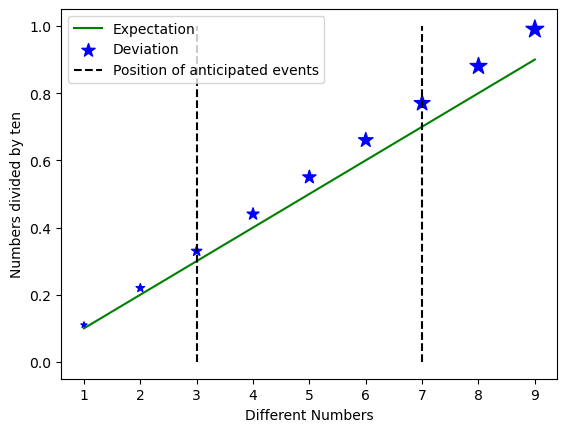

In [30]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9]

y = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

y2 = [0.11,0.22,0.33,0.44,0.55,0.66,0.77,0.88,0.99]

marker_sizes = [i*20 for i in x]

#initiate a figure with one figure
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(x,y, color = "green", label="Expectation")
ax.scatter(x=x,y=y2,color = "blue",s=marker_sizes,marker="*",label="Deviation")
ax.vlines(x=[3,7],ymin=0,ymax=1,colors="black",linestyles="--", label="Position of anticipated events")
ax.set_xlabel("Different Numbers")
ax.set_ylabel("Numbers divided by ten")

ax.legend()



# Let's gain some experience ourselves !
We gathered 3 samples of  a HEK293 control cell line and 3 samples of a UHRR cancer cell line and would like to investigate, if there are any significant changes in the modification landscape of specific cancer risk genes. Therefore, we aligned our datasets to the human reference genome hg38 and filtered the data for known cancer genes. 

During the course we would like you to select reads aligning to a specific cancer risk gene of your choice and investigate if there are significant changes in modifications at specific positions on those reads. 

Please notice that we do not know the outcome of these investigations, hence you are at the forefront of these investigations. 

## Tasks

1) Please check out the following link ([https://seafile.rlp.net/d/554453c725a843d5bf05/](https://seafile.rlp.net/d/554453c725a843d5bf05/)) to download the different BAM file samples for the analysis. You should receive 3 HEK293 and 3 UHRR samples in BAM format. Please also download the .bam.bai files, since you will need them for step 3. Additionally you should find a file in bed format, which carries all Exon coordinates of the cancer genes we filtered for.

2) Load the bed files as a pandas dataframe and try to find out which genes are included in the bed file. Select a gene of interest and continue with the next step. Please make sure not to take the same gene as other participants of the course. (Hint: try to use pandas unique function to find the names of the different genes)

In [ ]:
#Insert code for loading the bed reference here


3) Open a console and activate the biomedical_practical_SS25 conda environment. Type "igv" into the console and a GUI with the integrative genome viewer (IGV) should appear. Select the human genome as reference on igv. Drag and drop the 6 BAM files into the genome viewer application. Once the files are loaded into igv search your gene of interest. (Hint: Check the link above for the documentation of IGV) Have a look on the coverage of the gene. 
- Does it seems like there is an even coverage ? 
- Do you observe any changes in coverage on different exons of the gene ? 
- Is there any systematic change in coverage over the whole construct visible ? 
- If yes could you make an educated guess, why the changes could occur from a biological point of view ? 
- Does your selected gene of interest show a reasonable coverage to make statistical predictions on it ? (Hint: Coverage over 20 is fine) 
- Before you continue make sure your gene has a higher coverage than 20 at a reasonable amount of exons. Not all exons must be necessarily covered well. 

Please provide your answers to the questions here ->

4) Retrieve all start an end coordinates fo all exons within you gene of interest. These coordinates ca be found in the dataframe you loaded in task 2. Filter the dataframe and assign the filtered version to a new variable. (Check the pandas documentation to filter dataframes with conditional commands)

In [ ]:
#Insert code for filtering the bed reference here

5) Run modkit on all 6 samples you downloaded in task 1 and store the output tables on your computer. Use a reasonable filter threshold to obtain the modification ratios. Read the ouput tables of modkit with pandas as shown in the modkit cheat sheet section and assign them to different variables. 


In [ ]:
#Insert code to run modkit on the six bamfiles and load the output dataframes. 

6) Write a function which filters the dataframes to obtain all entries with coordinates covering a gene of interest using the reference bed and the input be file. The function should return the filtered dataframe. Run the function on all six samples.  


In [ ]:
#Insert code to filter your modkit output dataframe for coordinates covering the gene of interest. 

7) Reconstruct the gene of interest by concatenating the exons of the gene in a reasonable way and plot the modification ratios of the 6 samples as a lineplot with matplotlib. Colorcode the the samples by condition. Try to subsample the plot to positions, which seem to carry a modification over the gene of interest.

In [ ]:
#Insert code to plot general modification ratios of the different samples 

8) Moreover it would be interesting to discriminate between modification of different types. Annotate the modification types of the different positions and include the information in the plot by using a method of your choice. 

In [ ]:
#Insert code to annotate different types of modifications on the plot. 